In [1]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [1]:
import pandas as pd
df=pd.read_csv('state_totals.csv')

In [2]:
df.set_index('demographic',inplace=True)

In [3]:
df.index=['all','asian','black','latinx','white']

In [4]:
from scipy.stats import chi2_contingency

chi2,p = chi2_contingency(df[['count_total_tested','count_met_standard']].drop('all'), 
                          correction=False)[:2] #Turns off Yate's correction
table = pd.DataFrame(index=['Value'], columns=['Chi^2', 'p'])
table.loc[:,:] = [chi2, p]

table

,Chi^2,p
Value,2628.77,0


In [15]:
demographics=['asian','black','latinx','white']
p_vals=pd.DataFrame(index=demographics, columns=pd.Index(demographics,name='(Chi^2, p)'))

for group1 in demographics:
    for group2 in demographics:
        contingency=df.loc[[group1,group2],'count_total_tested':'count_met_standard']
        chi2,p_val=chi2_contingency(contingency, correction=False)[:2]
        p_vals.loc[group1,group2]=(np.round(chi2,2),np.round(p_val,4))
p_vals.style.set_caption("Chi^2 Post Hoc Comparison Tests")    

"(Chi^2, p)",asian,black,latinx,white
asian,"(0.0, 1.0)","(805.48, 0.0)","(2001.31, 0.0)","(322.07, 0.0)"
black,"(805.48, 0.0)","(0.0, 1.0)","(7.15, 0.0075)","(453.74, 0.0)"
latinx,"(2001.31, 0.0)","(7.15, 0.0075)","(0.0, 1.0)","(1587.79, 0.0)"
white,"(322.07, 0.0)","(453.74, 0.0)","(1587.79, 0.0)","(0.0, 1.0)"


In [16]:
bonferonni_cutoff=.05/6

In [17]:
.05/6

0.008333333333333333

In [18]:
demographics=['asian','black','latinx','white']
p_vals2=pd.DataFrame(index=demographics, columns=pd.Index(demographics,name='(Odds, p)'))

for group1 in demographics:
    for group2 in demographics:
        contingency=df.loc[[group1,group2],'count_total_tested':'count_met_standard']
        odds,p_val=fisher_exact(contingency)
        p_vals2.loc[group1,group2]=(np.round(odds,2),np.round(p_val,4))
        
p_vals2.T.style.set_caption("Fisher's Exact Post Hoc Tests with Odds Ratios")

,asian,black,latinx,white
"(Odds, p)",,,,
asian,"(1.0, 1.0)","(3.54, 0.0)","(3.14, 0.0)","(1.46, 0.0)"
black,"(0.28, 0.0)","(1.0, 1.0)","(0.89, 0.0072)","(0.41, 0.0)"
latinx,"(0.32, 0.0)","(1.13, 0.0072)","(1.0, 1.0)","(0.46, 0.0)"
white,"(0.69, 0.0)","(2.43, 0.0)","(2.15, 0.0)","(1.0, 1.0)"


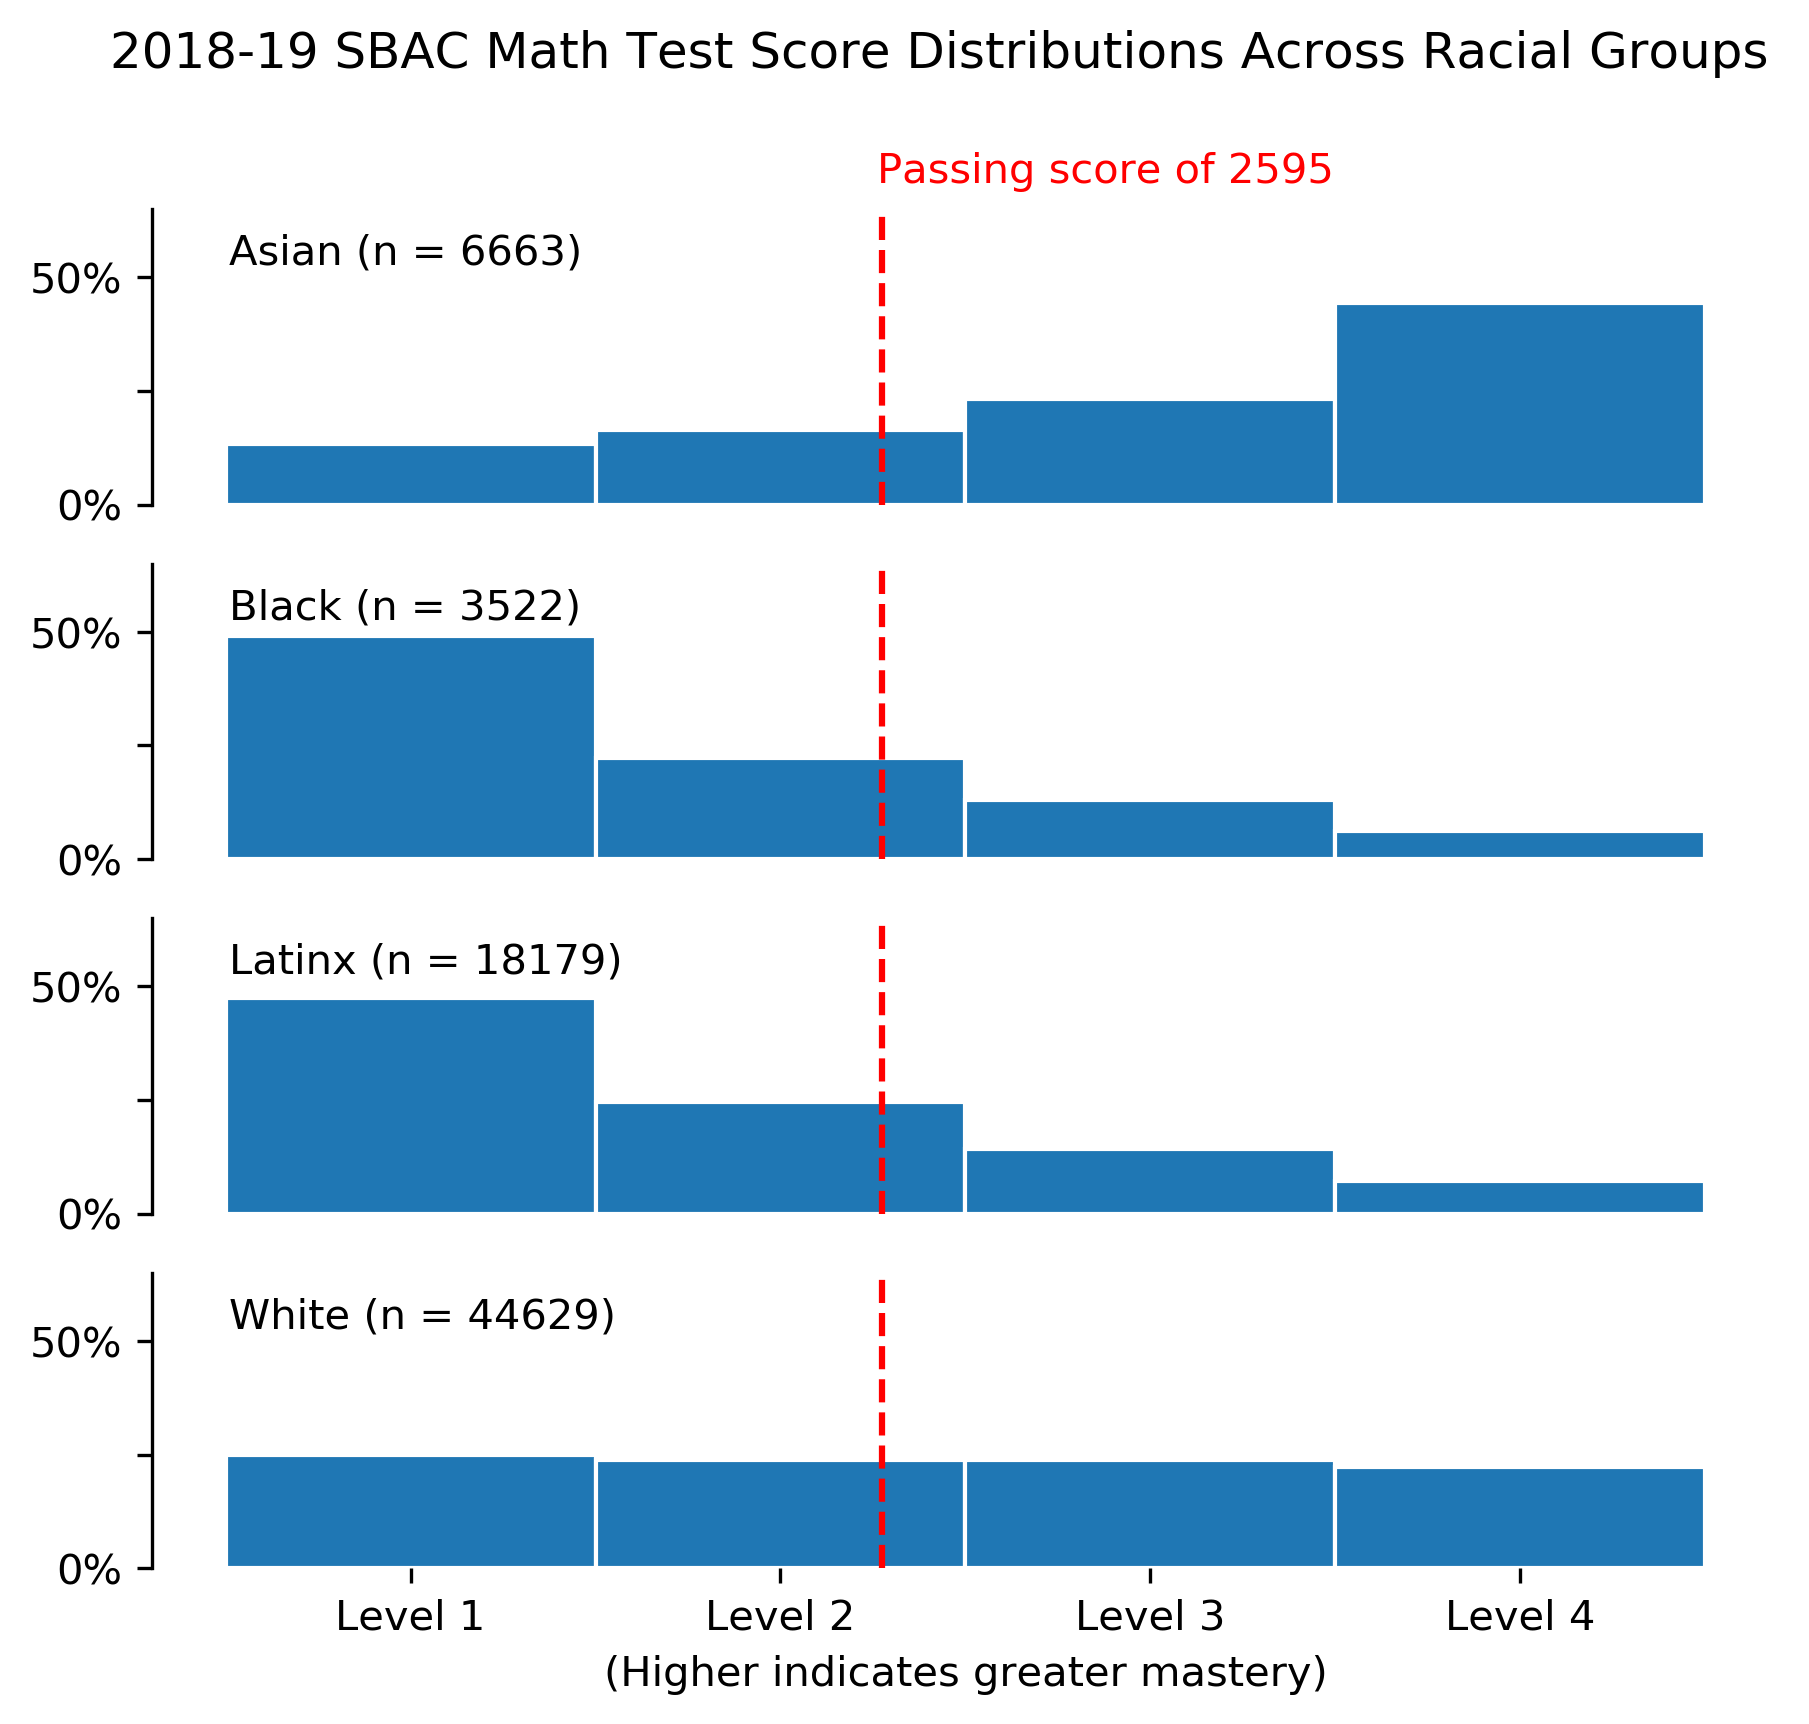

In [25]:
plt.figure(figsize=(7,6))
for i,part in enumerate(df.index[1:]):

    ax=plt.subplot(4,1,i+1)
    plt.bar(x=[0,1,2,3],height=df.loc[part,'percent_level_1':],width=[1]*4,align='edge', edgecolor='w')
    if i<3:
        plt.xticks(ticks=[], labels=[]);
    else:
        plt.xticks(ticks=np.array([0,1,2,3])+.5, labels=['Level '+str(i) for i in range(1,5)]);
        plt.xlabel('(Higher indicates greater mastery)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.text(0.01,.53, part.title() + ' ({})'.format('n = '+str(df.loc[part,'count_total_tested'])))
    ax.set_ylim(0,.65)
    plt.yticks(ticks=[0,.25,.5],labels=['0%','','50%'])
    plt.axvline(x=1+62/80, color='r', linestyle='--')

plt.suptitle("2018-19 SBAC Math Test Score Distributions Across Racial Groups")
#plt.tight_layout(rect=(0,0,.93,.9))
plt.text(x=1.76,y=3.05,s='Passing score of 2595', color='r');#Source https://www.sbe.wa.gov/our-work/graduation-pathway-options
